<a href="https://colab.research.google.com/github/gauravjha201/Deep_Learning_basics/blob/main/DL_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def unet_block(x,filters):
  conv=layers.Conv2D(filters,(3,3),activation='relu',padding='same')(x)
  conv=layers.Conv2D(filters,(3,3),activation='relu',padding='same')(conv)
  return conv


In [ ]:
def build_unet(input_shape=(128,128,3),num_classes=1):
  inputs=layers.Input(shape=input_shape)

  conv1=unet_block(inputs,64)
  max1=layers.MaxPooling2D((2,2))(conv1)

  conv2=unet_block(max1,128)
  max2=layers.MaxPooling2D((2,2))(conv2)

  bn=unet_block(max2,256)

  up1=layers.UpSampling2D((2,2))(bn)
  up1=layers.concatenate([up1,conv2])
  conv3=unet_block(up1,128)

  up2=layers.UpSampling2D((2,2))(conv3)
  up2=layers.concatenate([up2,conv1])
  conv4=unet_block(up2,64)

  output=layers.Conv2D(num_classes,(1,1),activation='sigmoid')(conv4)

  return models.Model(inputs=inputs,outputs=output)




In [ ]:
model=build_unet()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 64, 64,    │          0 │ conv2d_5[0][0]    │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64,    │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 384)              │            │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │    442,496 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 64, 64,    │    147,584 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 128, 128,  │          0 │ conv2d_7[0][0]    │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128, 128,  │          0 │ up_sampling2d_1[… │
│ (Concatenate)       │ 192)              │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 128, 128,  │    110,656 │ concatenate_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 128, 128,  │     36,928 │ conv2d_8[0][0]  

 Total params: 1,883,137 (7.18 MB)

 Trainable params: 1,883,137 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def load_image(path,target_size=(128,128)):
  img=tf.keras.preprocessing.image.load_img(path,target_size=target_size)
  img=tf.keras.preprocessing.image.img_to_array(img)
  img=img/255

  return img

In [ ]:
img=load_image('/content/IMG_20240921_193758_141[1].jpg')
pred_mask=model.predict(np.expand_dims(img,axis=0))[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


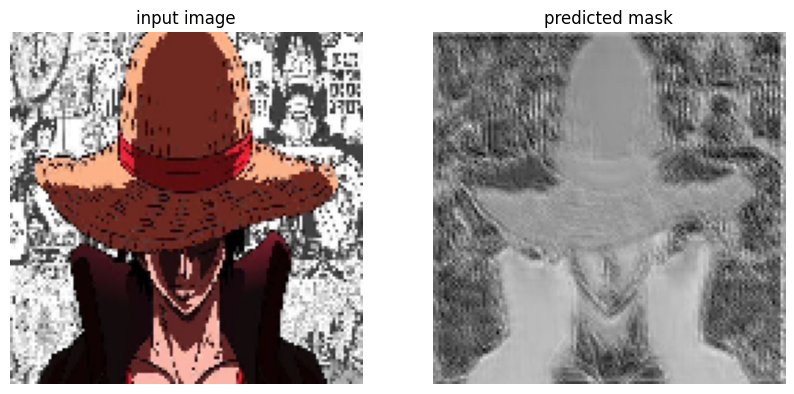

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title("input image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("predicted mask")
plt.imshow(pred_mask[:,:,0],cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
import tensorflow_datasets as tfds
dataset,info=tfds.load("oxford_iiit_pet:4.0.0",with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.RFZLW8_4.0.0/oxford_iiit_pet-train.tfrecord*...…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.RFZLW8_4.0.0/oxford_iiit_pet-test.tfrecord*...:…

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/4.0.0. Subsequent calls will reuse this data.


In [ ]:
def preprocess(data):
    image=tf.image.resize(data['image'],(128,128))
    mask=tf.image.resize(data['segmentation_mask'],(128,128))

    image=tf.cast(image,tf.float32)/255

    mask=tf.where(mask>1,1,0)
    mask=tf.cast(mask,tf.float32)

    return image,mask



In [ ]:
train_dataset=dataset['train'].map(preprocess).shuffle(1000).batch(16)
test_dataset=dataset['test'].map(preprocess).batch(16)


In [ ]:
def iou_metric(y_true,y_pred):
  y_pred=tf.cast(y_pred>0.5,tf.float32)
  intersection=tf.reduce_sum(y_pred*y_true)
  union=tf.reduce_sum(y_pred)+tf.reduce_sum(y_true)-intersection

  return intersection/(union+1e-7)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',iou_metric] )



In [ ]:
history=model.fit(train_dataset,validation_data=test_dataset,epochs=5)


Epoch 1/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 76s 210ms/step - accuracy: 0.6999 - iou_metric: 0.6871 - loss: 0.5803 - val_accuracy: 0.7530 - val_iou_metric: 0.6989 - val_loss: 0.4700
Epoch 2/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 44s 175ms/step - accuracy: 0.7448 - iou_metric: 0.6916 - loss: 0.4727 - val_accuracy: 0.7731 - val_iou_metric: 0.7142 - val_loss: 0.4432
Epoch 3/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 79s 169ms/step - accuracy: 0.7647 - iou_metric: 0.7130 - loss: 0.4561 - val_accuracy: 0.7893 - val_iou_metric: 0.7577 - val_loss: 0.4282
Epoch 4/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 54s 219ms/step - accuracy: 0.7910 - iou_metric: 0.7467 - loss: 0.4304 - val_accuracy: 0.8180 - val_iou_metric: 0.7690 - val_loss: 0.3974
Epoch 5/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 43s 177ms/step - accuracy: 0.8163 - iou_metric: 0.7725 - loss: 0.3951 - val_accuracy: 0.8532 - val_iou_metric: 0.8150 - val_loss: 0.3299


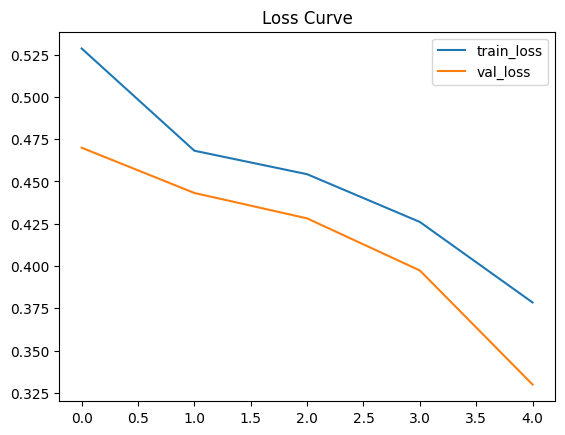

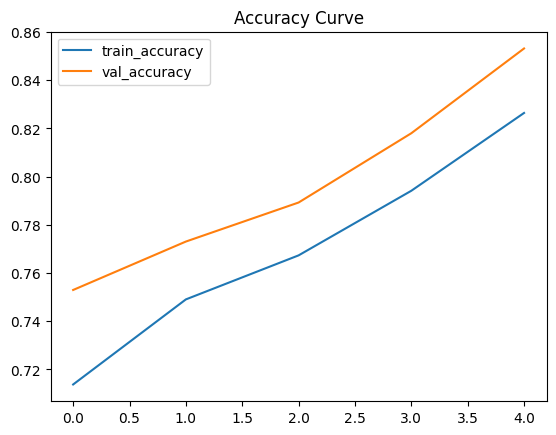

In [ ]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()


In [ ]:
def display_predictions(dataset,num=3):
  for image,mask in dataset.take(1):
    pred=model.predict(image)

    plt.figure(figsize=(10,num*4))
    for i in range(num):
      plt.subplot(num,3,3*i+1)
      plt.imshow(image[i])
      plt.title('Image')
      plt.axis('off')

      plt.subplot(num,3,3*i+2)
      plt.imshow(mask[i][:,:,0],cmap='gray')
      plt.title('True mask')
      plt.axis('off')

      plt.subplot(num,3,3*i+3)
      plt.imshow(pred[i][:,:,0],cmap='gray')
      plt.title('predected Mask')
      plt.axis('off')


    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


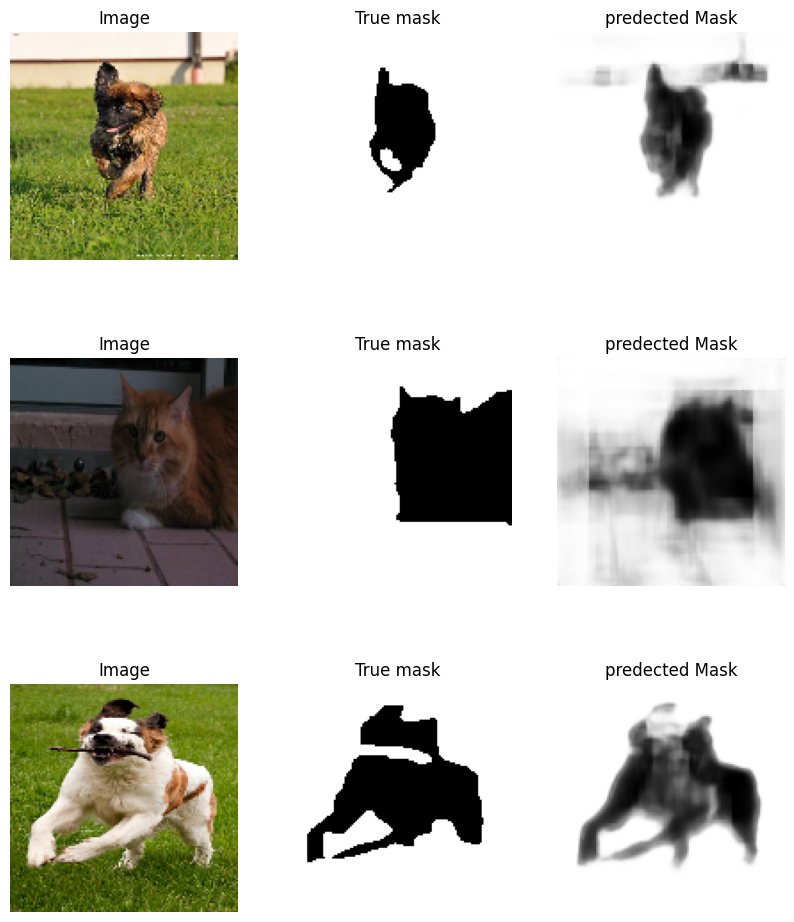

In [ ]:
display_predictions(test_dataset)


In [ ]:
model.evaluate(test_dataset)


230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.8542 - iou_metric: 0.8162 - loss: 0.3284


[0.329914391040802, 0.8531533479690552, 0.8150351047515869]